In [1]:
from math import ceil

import torch
import torch.nn.functional as F
from torch.autograd.functional import jacobian
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

In [2]:
def interp_mat(n):
    n_on_2 = ceil(n/2) - 1

    stencil = torch.tensor([1., 2., 1.])
    mat = torch.zeros((n_on_2, n))
    for i in range(n_on_2):
        mat[i, 2*i:2*i+3] = stencil
    
    return 0.5*mat

In [3]:
def my_interp(pic):
    n, m = pic.shape[-2:]
    left = interp_mat(2*m)
    right = interp_mat(2*n).T
    
    return torch.matmul(left, torch.matmul(pic, right))

def my_restrict(pic):
    n, m = pic.shape[-2:]
    left = interp_mat(n)
    right = interp_mat(m).T

    return torch.matmul(left, torch.matmul(pic, right))
    

In [4]:
torch.set_printoptions(precision=2, threshold=None, edgeitems=None, linewidth=None, profile=None, sci_mode=None)

In [5]:
transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize((0.1307,), (0.3081,))
                                   ])
data = datasets.MNIST("./data", download=True, transform=transform)
pic, labels = next(iter(data))
pic = torch.unsqueeze(pic, dim=0)
# pic.requires_grad = True
pic_2 = F.interpolate(pic, scale_factor=2, mode="bilinear", align_corners=False)

pic_d2 = F.interpolate(pic, scale_factor=1/2, mode="bilinear", align_corners=False)
my_pic_d2 = my_restrict(pic)
pic_d4 = F.interpolate(pic_d2, scale_factor=1/2, mode="bilinear", align_corners=False)
pic_d4.requires_grad = True
pic_d8 = F.interpolate(pic_d4, scale_factor=1/2, mode="bilinear", align_corners=False)
pic_d16 = F.interpolate(pic_d8, scale_factor=1/2, mode="bilinear", align_corners=False)
# pic_d32 = F.interpolate(pic_d16, scale_factor=1/2, mode="bilinear", align_corners=False)

/home/cadaverous/anaconda3/envs/py37/lib/python3.7/site-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


TypeError: interp_mat() missing 1 required positional argument: 'm'

In [6]:
print(pic.size())
print(my_restrict(pic).size())
print(my_interp(pic).size())

torch.Size([1, 1, 28, 28])


TypeError: interp_mat() missing 1 required positional argument: 'm'

In [7]:
print(pic.shape)
print(pic_2.shape)
print(pic_d2.shape)
print(pic_d4.shape)
print(pic_d8.shape)
print(pic_d16.shape)


torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 56, 56])
torch.Size([1, 1, 14, 14])


NameError: name 'pic_d4' is not defined

In [8]:
print(torch.reshape(jacobian(lambda x : F.interpolate(x, scale_factor=2, mode="bilinear"), pic_d8), (18, 18)))
# print(torch.squeeze(jacobian(lambda x : F.interpolate(x, scale_factor=2, mode="bilinear"), torch.ones(pic_d8.shape))).shape)

NameError: name 'pic_d8' is not defined

In [9]:
print(pic_d4.grad)

NameError: name 'pic_d4' is not defined

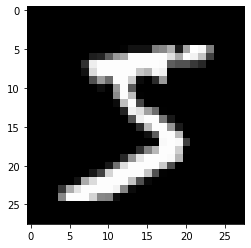

In [10]:
plt.imshow(torch.squeeze(pic), cmap="gray")

In [11]:
plt.imshow(torch.squeeze(my_pic_d2), cmap="gray")

NameError: name 'my_pic_d2' is not defined

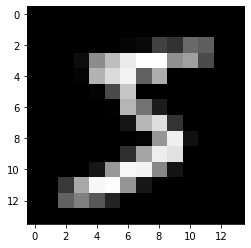

In [12]:
plt.imshow(torch.squeeze(pic_d2), cmap="gray")

In [95]:
plt.imshow(torch.squeeze(pic_d4), cmap="gray")

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

TypeError: 'NoneType' object is not callable